# Stock Price Prediction - Data Exploration

In [ ]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import config
from data.data_loader import StockDataLoader
from utils.visualization import StockVisualization

# Initialize visualization object
viz = StockVisualization()

plt.style.use('seaborn-v0_8')
%matplotlib inline

## 1. Data Loading and Basic Information

In [2]:
# Load stock data
loader = StockDataLoader(symbols=config.stocks, period='2y')
data = loader.get_combined_data()

print(f"Dataset shape: {data.shape}")
print(f"Date range: {data.index.min()} to {data.index.max()}")
print(f"Symbols: {data['symbol'].unique()}")
print(f"\nColumns: {list(data.columns)}")

Fetching data for SPY
Fetching data for QQQ
Fetching data for AAPL
Fetching data for MSFT
Fetching data for GOOGL
Fetching data for TSLA
Successfully loaded data for 6 symbols
Dataset shape: (3006, 9)
Date range: 0 to 3005
Symbols: ['SPY' 'QQQ' 'AAPL' 'MSFT' 'GOOGL' 'TSLA']

Columns: ['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock splits', 'capital gains', 'symbol']


In [3]:
# Basic statistics
data.describe()

,open,high,low,close,volume,dividends,stock splits,capital gains
count,3006.000000,3006.000000,3006.000000,3006.000000,3.006000e+03,3006.000000,3006.0,1002.0
mean,337.153786,340.298681,333.908706,337.261384,5.328932e+07,0.009616,0.0,0.0
std,146.126503,146.392076,145.635246,146.087756,3.496036e+07,0.106036,0.0,0.0
min,122.147432,122.574869,119.493351,121.441666,7.164500e+06,0.000000,0.0,0.0
25%,192.111478,194.414045,190.112855,191.981800,2.681412e+07,0.000000,0.0,0.0
50%,345.594574,352.883001,340.367894,346.229996,4.449485e+07,0.000000,0.0,0.0
75%,456.063842,461.232727,452.108162,457.051895,6.847760e+07,0.000000,0.0,0.0
max,639.460022,642.849976,636.789978,642.690002,3.186799e+08,1.966000,0.0,0.0


In [4]:
# Check for missing values
missing_data = data.isnull().sum()
print("Missing values per column:")
print(missing_data[missing_data > 0])

Missing values per column:
capital gains    2004
dtype: int64


## 2. Stock Price Visualization

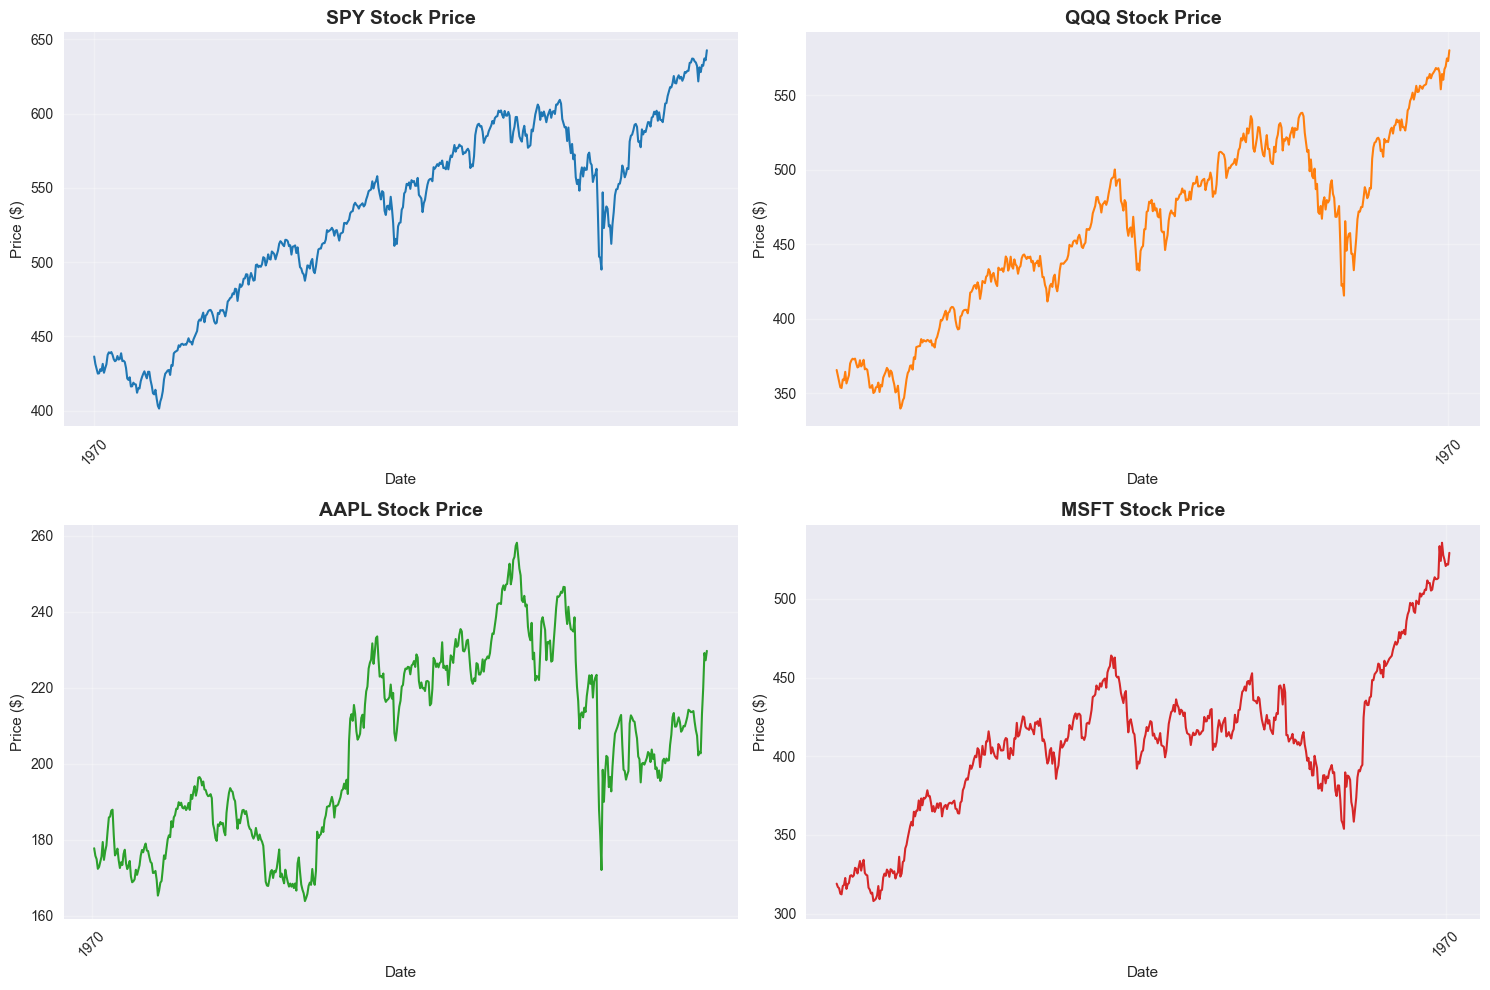

In [5]:
# Plot stock prices
viz.plot_stock_prices(data, symbols=config.stocks)

## 3. Data Analysis

In [6]:
# Data analysis
print(f"Dataset shape: {data.shape}")
print(f"Columns: {list(data.columns)}")

Dataset shape: (3006, 9)
Columns: ['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock splits', 'capital gains', 'symbol']


## 4. Feature Correlation Analysis

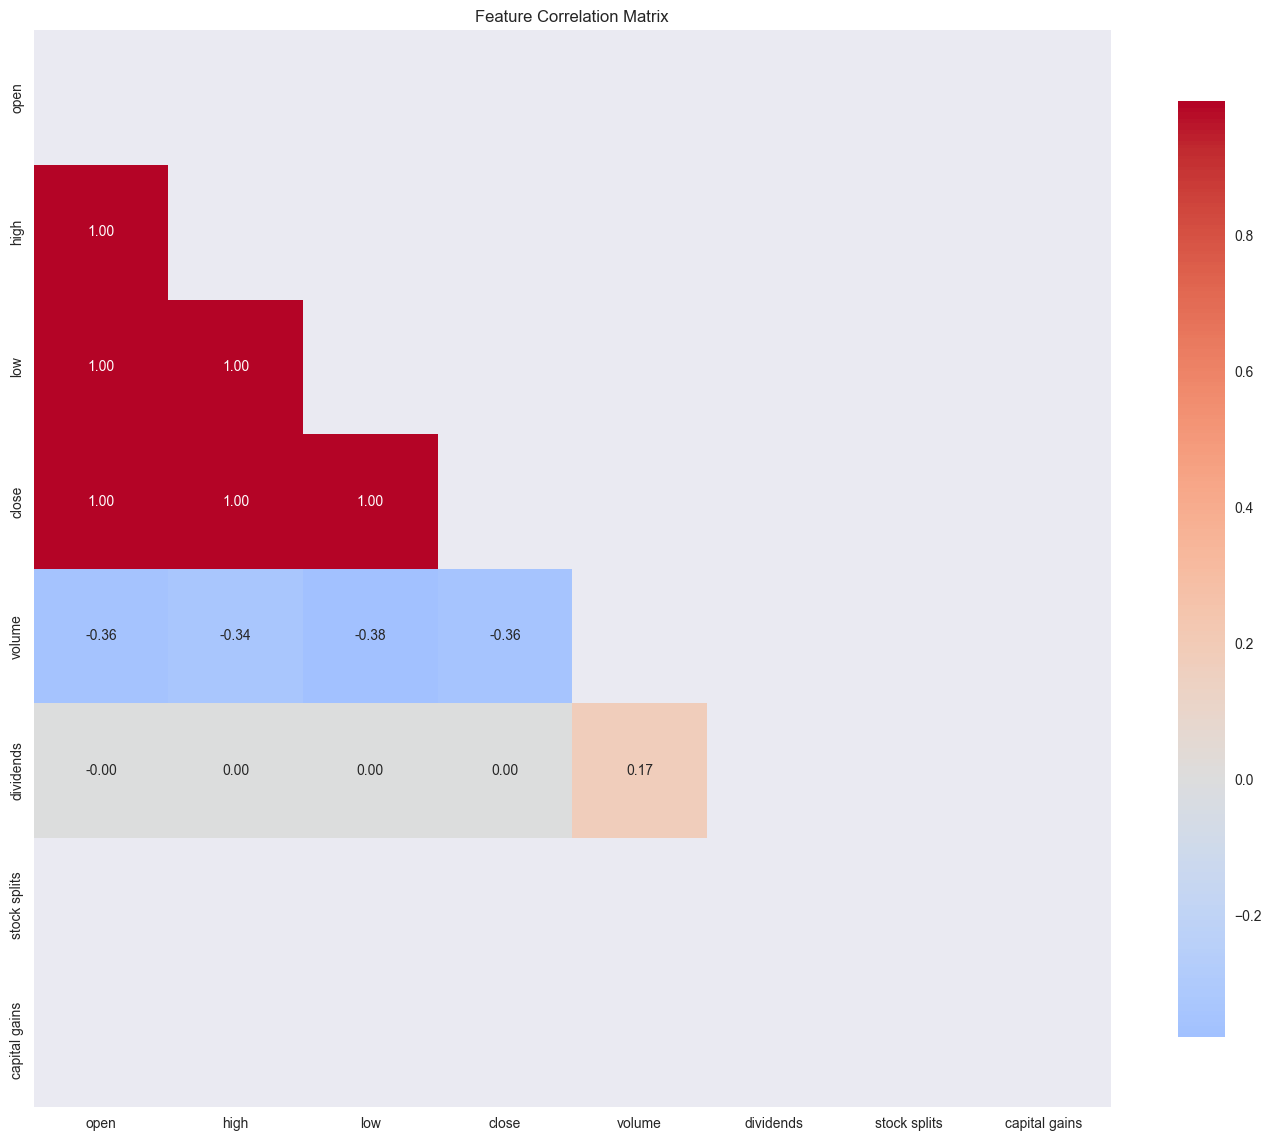

In [15]:
# Select numeric features for correlation analysis
single_data = data[data['symbol'] == config.stocks[0]].copy()
numeric_features = single_data.select_dtypes(include=[np.number]).columns
numeric_features = [col for col in numeric_features if col not in ['symbol']]

# Plot correlation matrix
viz.plot_correlation_matrix(single_data[numeric_features], figsize=(14, 12))

## 5. Price Returns Analysis

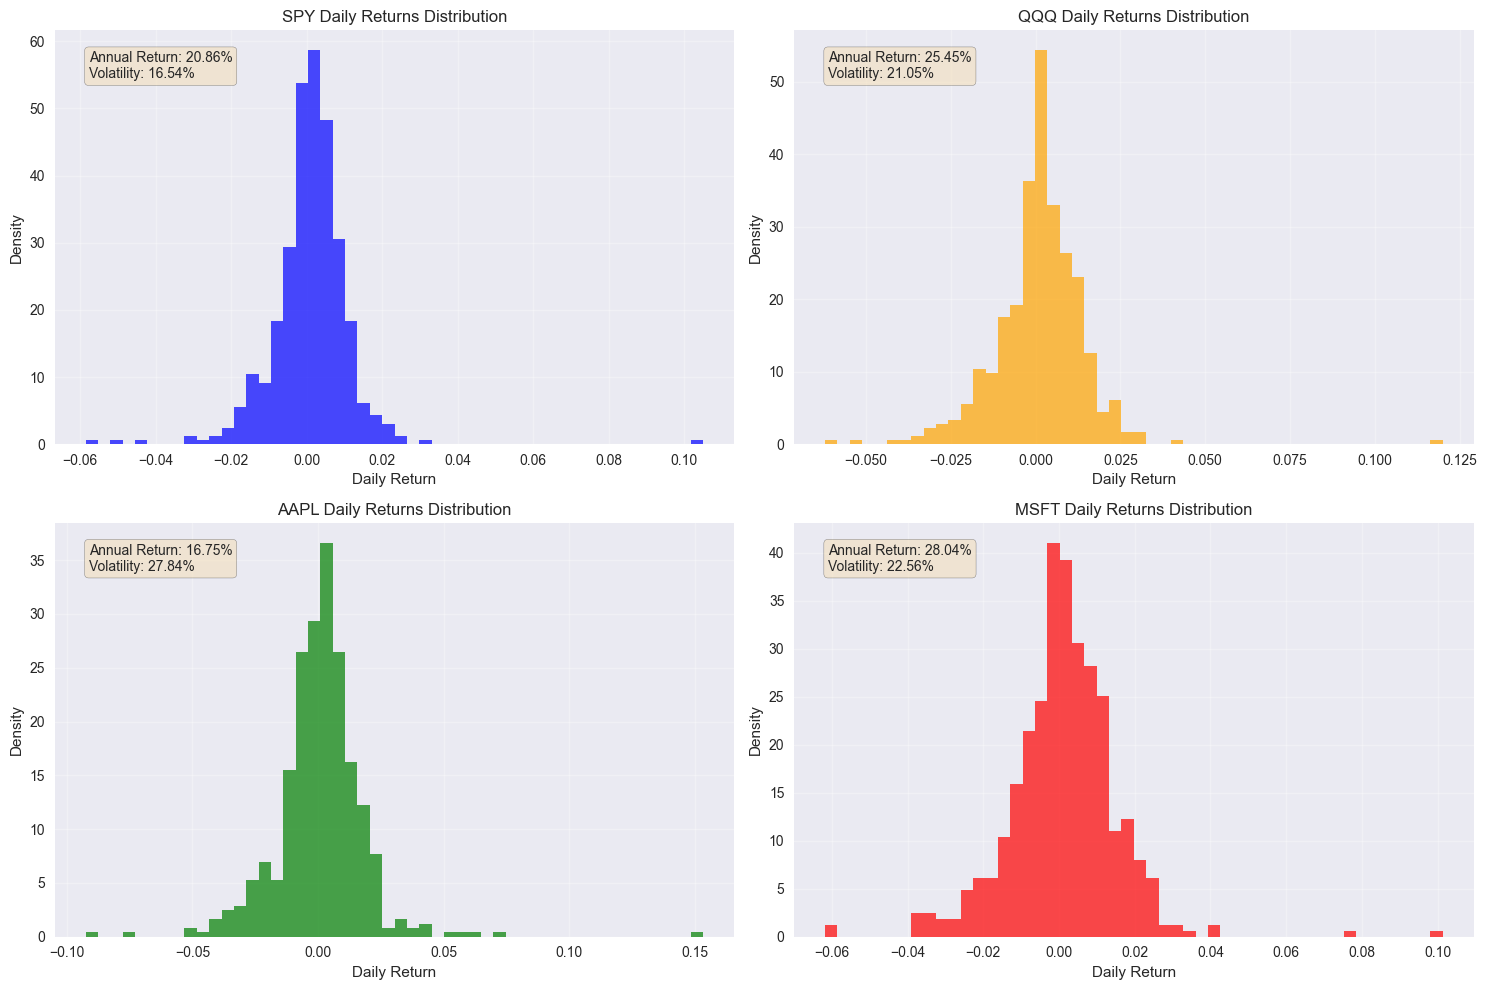

In [8]:
# Calculate daily returns for each stock
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

symbols = data['symbol'].unique()[:4]
colors = ['blue', 'orange', 'green', 'red']

for i, symbol in enumerate(symbols):
    symbol_data = data[data['symbol'] == symbol].copy()
    returns = symbol_data['close'].pct_change().dropna()
    
    axes[i].hist(returns, bins=50, alpha=0.7, color=colors[i], density=True)
    axes[i].set_title(f'{symbol} Daily Returns Distribution')
    axes[i].set_xlabel('Daily Return')
    axes[i].set_ylabel('Density')
    axes[i].grid(True, alpha=0.3)
    
    # Add statistics
    mean_return = returns.mean() * 252  # Annualized
    volatility = returns.std() * np.sqrt(252)  # Annualized
    axes[i].text(0.05, 0.95, f'Annual Return: {mean_return:.2%}\nVolatility: {volatility:.2%}', 
                transform=axes[i].transAxes, verticalalignment='top', 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

## 6. Volatility Analysis

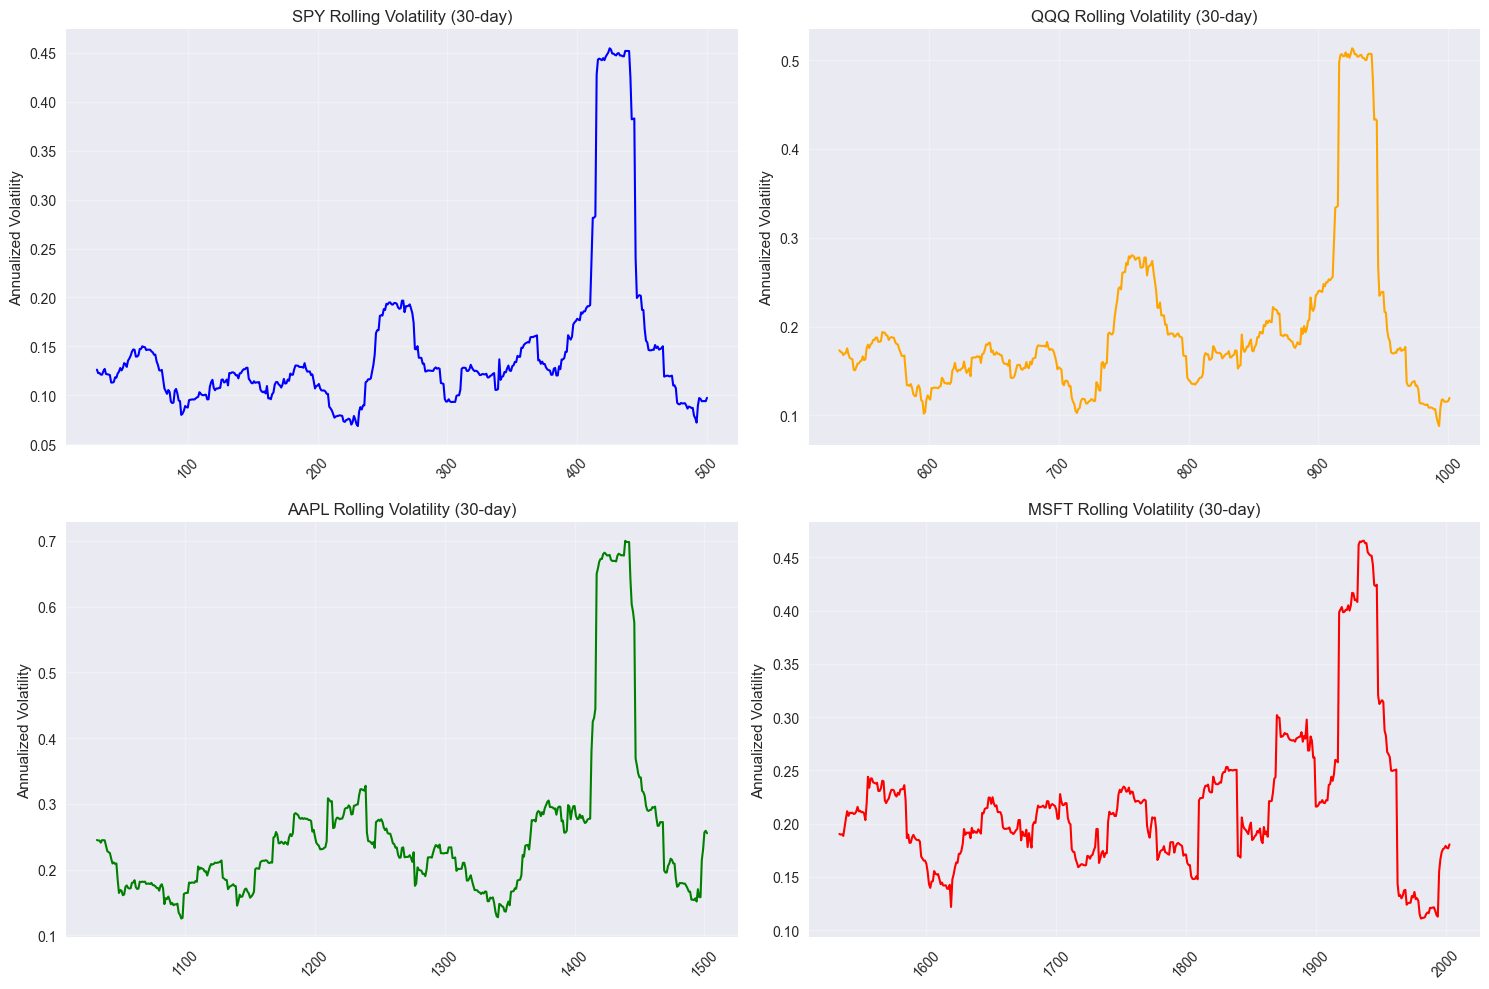

In [9]:
# Calculate rolling volatility
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, symbol in enumerate(symbols):
    symbol_data = data[data['symbol'] == symbol].copy()
    returns = symbol_data['close'].pct_change().dropna()
    
    # 30-day rolling volatility
    rolling_vol = returns.rolling(window=30).std() * np.sqrt(252)
    
    axes[i].plot(rolling_vol.index, rolling_vol, color=colors[i], linewidth=1.5)
    axes[i].set_title(f'{symbol} Rolling Volatility (30-day)')
    axes[i].set_ylabel('Annualized Volatility')
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()